# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [14]:
import numpy as np
import pandas as pd
from plotnine import *

In [15]:
# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [16]:
#Creates a new variable, type, that is derived from the existing variable class and categorizes the data between passenger and crew
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"})

#Filters the data to include passengers only
passengers_only = df_titanic[(df_titanic["type"] == "passenger")]
passengers_only

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1,passenger
...,...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0,passenger
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0,passenger
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0,passenger
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1,passenger


In [17]:
crosstab_class_embarked = pd.crosstab(passengers_only["class"], df_titanic["embarked"])
crosstab_class_embarked

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

Reference: https://allendowney.github.io/BiteSizeBayes/10_joint.html

In [18]:

# Calculating the Conditional distribution of Class where they given Embarked
conditional_given_embarked = crosstab_class_embarked.divide(crosstab_class_embarked.sum(axis=0), axis=1)

# Conditional distribution of Embarked given Class
conditional_embarked_class = crosstab_class_embarked.divide(crosstab_class_embarked.sum(axis=1), axis=0
                                                            )
print("Conditional distribution of Class given Embarked")
print(conditional_given_embarked)

print("Conditional distribution of Embarked given Class")
print(conditional_embarked_class)

Conditional distribution of Class given Embarked
embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481
Conditional distribution of Embarked given Class
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756


**Using the the conditional distribution calculated, we can say that the proportion of 3rd class passengers that embarked at Southampton is 0.696756 or 69.68%.**
**Using the the conditional distribution calculated, we can say that the proportion of Southhampton passengers that were in 3rd class is 0.305693 or 30.57%.**

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

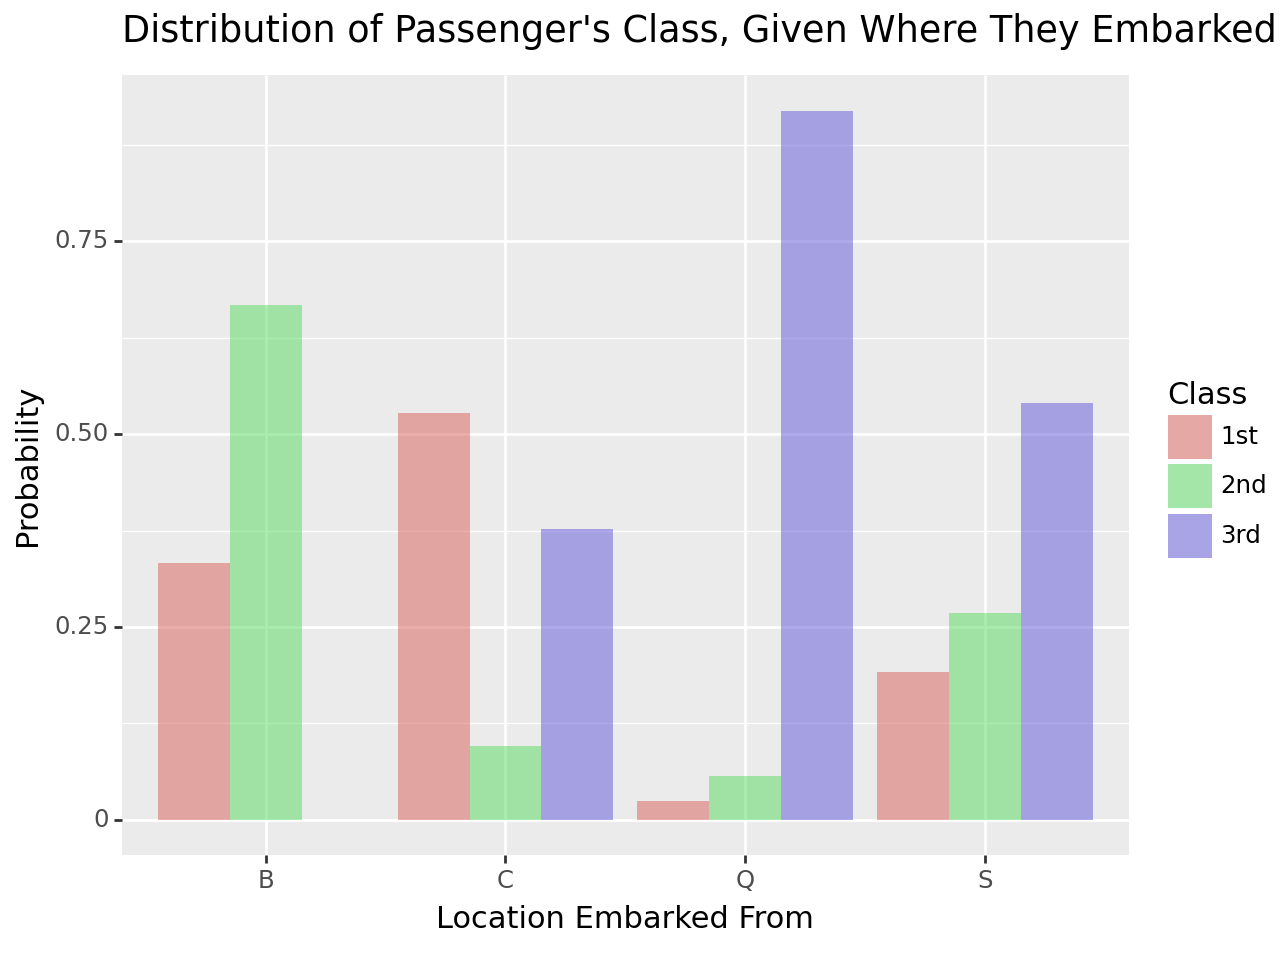

In [19]:
# Define data with distribution of a passenger's class, given where they embarked from data output above
data = {
    'Class': ['1st', '2nd', '3rd'],
    'B': [ 0.333333, 0.666667, 0.000000],
    'C': [0.527675, 0.095941, 0.376384],
    'Q': [0.024390, 0.056911, 0.918699],
    'S': [0.191466, 0.268053, 0.540481]}

# Convert data to dataframe
df = pd.DataFrame(data)

# Convert the dataframe to a long format so we're able to plot it
long_df = df.melt(id_vars="Class", value_vars = ['B', 'C', 'Q', 'S'], var_name="Embarked", value_name="Probability")

# Creating the bar graph to visualize the distribution oof the passenger's class versus the embarked location
bar_graph = (ggplot(long_df, aes(x = 'Embarked', y = 'Probability', fill = 'Class'))
             + geom_bar(stat = 'identity', position = 'dodge', alpha = 0.5)
             + labs(title = "Distribution of Passenger's Class, Given Where They Embarked")
             + ylab("Probability")
             + xlab("Location Embarked From"))

# Print the bar graph
print(bar_graph)



I think some pros to using the visualization, i.e a bar graph shown above include the fact that bar graphs have a better visual representation making it easy to interpret compared to numerical data shown in the distribution which everyone may not unnderstand or interpret. Also, bar plots make it more convenient to compare different categories next to each other in a bar graph
annd lastly,  it is better to use barplots when certain insights might want to be captured for specific points or with visuals. However, the cons associated with bar plots when compared to raw data seen in distributions include the fact that bar plot may oversimplify complex data or not full  represent every datapoint from the dataset while conditional distributions have a more precise representation. Lastly, sometimes visuals in barplots can be misleading and wronngly interpreted while the distribution data is straight-forward.
